# Aula 5 - KNN e ferramentas especiais

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Ferramentas Especiais
- 2) KNN para regressão

____
____
____

## Exercício da aula passada

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, f1_score, r2_score

from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score

In [32]:
df = pd.read_csv("insurance.csv")

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [34]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [35]:
df['target'] = np.where(df['charges'] < 10000, 0, np.where(df['charges'] < 30000, 1, 2))

In [36]:
df['flag_sex'] = np.where(df['sex'] == 'female', 1, 0)

In [37]:
df['is_smoker'] = np.where(df['smoker'] == 'yes', 1, 0)

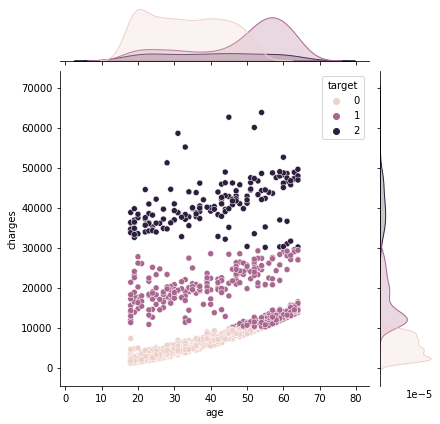

In [38]:
sns.jointplot(data=df, x='age', y='charges', hue='target')

In [41]:
X = df.drop(['charges', 'target', 'sex', 'smoker', 'region'], axis = 1)
y = df["target"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5)

model.fit(X_train_std, y_train)

y_pred = model.predict(X_test_std)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       143
           1       0.85      0.75      0.80        93
           2       0.93      0.84      0.89        32

    accuracy                           0.87       268
   macro avg       0.88      0.85      0.86       268
weighted avg       0.87      0.87      0.86       268



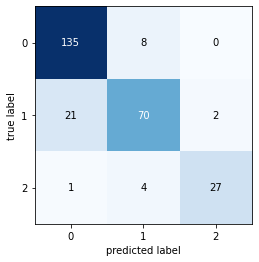

In [44]:
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(conf_mat=cm)
plt.show()

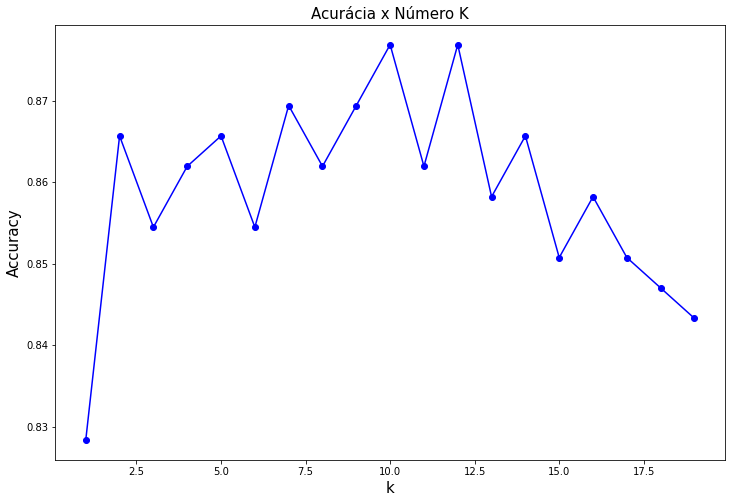

Melhor k: 10


In [45]:
from sklearn.metrics import accuracy_score

scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

ks = []
accuracys = []
for k in range(1, 20):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
    acc = accuracy_score(y_test, y_pred)
    accuracys.append(acc)
    ks.append(k)

plt.figure(figsize=(12,8))
plt.plot(ks, accuracys, '-bo')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.title('Acurácia x Número K', fontsize = 15)
plt.show(True)
best_k = np.argmax(accuracys)+1
print('Melhor k:', best_k)

## 1) Ferramentas especiais

Vamos agora ver algumas ferramentas especiais do sklearn que nos ajudam no desenvolvimento de modelos!

### Pipeline

O [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) é uma estrutura que o sklearn proporciona a fim de garantir que possamos em uma única estrutura passar **o estimador e o transformador** (e muitas outras coisas). Para maiores informações, [clique aqui](https://scikit-learn.org/stable/modules/compose.html#pipeline). 

Vamos ver a seguir como esta estrutura funciona:

**Para o train-test split normal**

[[71  1]
 [ 4 38]]


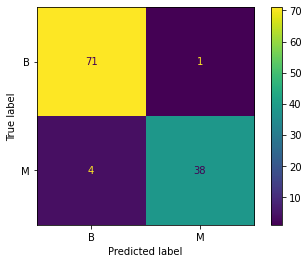

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


# ====================

[[284   1]
 [  9 161]]


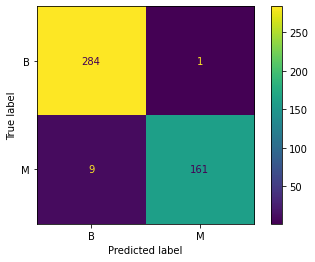

              precision    recall  f1-score   support

           B       0.97      1.00      0.98       285
           M       0.99      0.95      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455



In [18]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

# argumento: um lista de tuplas do tipo [("nome da estrutura", classe instanciada da estrutura)]
# na sequencia em que as estruturas (procedimentos) são aplicadas
lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier(n_neighbors=5))]

pipe = Pipeline(lista_etapas).fit(X_train, y_train)

# ====================

y_pred_test = pipe.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

y_pred_train = pipe.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

**Para a validação cruzada**

Isso resolve o problema que tivemos na última aula de vazamento de dados na validação cruzada!

In [19]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier(n_neighbors=5))]

pipe = Pipeline(lista_etapas)

# ====================

grupo = KFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

results = cross_validate(estimator=pipe,
                         X=X_train, y=y_train,
                         cv=grupo,
                         scoring=metrica,
                         return_train_score=True)

df_results = pd.DataFrame(results)

In [20]:
df_results

,fit_time,score_time,test_score,train_score
0,0.005057,0.004656,0.900000,0.950000
1,0.005189,0.007137,0.956522,0.945578
2,0.004678,0.000000,0.950000,0.946667
3,0.005193,0.000219,1.000000,0.934211
4,0.007322,0.002075,0.909091,0.949686
5,0.005448,0.005011,0.900000,0.940000
6,0.004826,0.000000,0.900000,0.946667
7,0.005046,0.004817,0.882353,0.941176
8,0.004545,0.005233,0.750000,0.949367
9,0.000000,0.009777,0.947368,0.933775


In [21]:
# com isso, resolvemos os problemas que tínhamos anteriormente de vazamento 
# de dados no crossvalidation! essa distribuição é bem mais confiável!!
df_results.describe()

,fit_time,score_time,test_score,train_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.004730,0.003892,0.909533,0.943713
std,0.001834,0.003279,0.066603,0.006123
min,0.000000,0.000000,0.750000,0.933775
25%,0.004715,0.000683,0.900000,0.940294
50%,0.005051,0.004736,0.904545,0.946122
75%,0.005192,0.005177,0.949342,0.948692
max,0.007322,0.009777,1.000000,0.950000


Uma boa ideia é usar o [StratifiedKFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html), pois ele mantém a estratificação do target dentro de cada split!

Isso é sobretudo importante pra dados desbalanceados (no target)

In [22]:
from sklearn.model_selection import StratifiedKFold

In [42]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier(n_neighbors=5))]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
grupo = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

results = cross_validate(estimator=pipe,
                         X=X_train, y=y_train,
                         cv=grupo,
                         scoring=metrica,
                         return_train_score=True)

df_results = pd.DataFrame(results)

In [43]:
df_results.describe()

,fit_time,score_time,test_score,train_score
count,10.000000,10.000000,10.000000,10.000000
mean,0.003527,0.004916,0.911765,0.945098
std,0.004815,0.005183,0.100938,0.008267
min,0.000000,0.000000,0.705882,0.934641
25%,0.000000,0.000000,0.838235,0.941176
50%,0.000000,0.004803,0.941176,0.944444
75%,0.008538,0.009805,1.000000,0.947712
max,0.010656,0.010083,1.000000,0.960784


## Exercício

1 - Vamos revisitar o dataset de House Prices, utilizado na aula 3. Lá, tinhamos um impedimento, a ausência do pipeline impedia o uso do cross_validate com o escalonamento (e os campos precisavam de escalonamento dada a discrepância de valores.)

#### Passo a passo

1 - Faça a leitura do dataset e escolha as features

2 - Efetue o train test split

3 - Defina as etapas do pipeline

4 - Instancie o pipeline

5 - Faça a divisão dos folds

6 - Chame o cross_validate

7 - avalie os resultados

In [29]:
from sklearn.linear_model import ElasticNet

In [27]:
house_prices = pd.read_csv('house_prices.csv')

### Gridsearch

O [Gridsearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) é uma estrutura que o sklearn proporciona para que seja feita **a busca exaustiva de hiperparâmetros de um estimador**.

Na prática, o que o gridsearch faz é **treinar diversos modelos com diferentes combinações de hiperparâmetros**, de modo a manter o melhor deles como o modelo final, tudo automaticamente! 

Tudo o que precisamos fazer é indicar quais os hiperparâmetros que queremos procurar: a **grade**!

<img src="https://www.yourdatateacher.com/wp-content/uploads/2021/03/image-6.png" width=500>

É muito comum também passarmos o **Pipeline** como argumento do gridsearch!

Para maiores informações, [clique aqui](https://scikit-learn.org/stable/modules/grid_search.html#grid-search). 

Vamos ver a seguir como esta estrutura funciona:

O Gridsearch avalia o melhor modelo segundo a métrica que passamos em `scoring`. [Clique aqui](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) para ver as métricas disponíveis por padrão.

Mas o GS vai além: ele não calcula a métrica uma única vez, mas sim **várias vezes**, conforme especificado pelo parâmetro `cv`. No fim, o melhor modelo é o que tem o melhor scoring **médio** entre as vezes que é calculado.

O "cv" quer dizer **Cross Validation**, o método mais seguro de realizar um treinamento e avaliação de um modelo que conhecemos na aula passada!

<img src="https://ethen8181.github.io/machine-learning/model_selection/img/kfolds.png" width=600> 

Com a validação cruzada, garantimos uma avaliação justa de cada um dos modelos candidatos (cada um construído com uma combinação diferente de hiperparâmetros).

Assim, sabemos que a melhor combinação de hiperparâmetros a ser encontrada não estará de qualquer forma "overfitada" em particularidades da base de treino!

Vamos colocar tudo em uma única célula:

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
from sklearn.metrics import f1_score

In [76]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(2, 21)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 76 candidates, totalling 760 fits
[CV 1/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 3/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 1/76] END knn__metric=manhatt

[CV 5/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 6/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 7/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 8/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 9/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 10/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__

[CV 2/10; 10/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 3/10; 10/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 3/10; 10/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 10/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 4/10; 10/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 10/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 5/10; 10/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 6/10; 10/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 6/10; 10/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 7/10; 10/76] START knn__metric=manhattan, knn__n_

[CV 5/10; 14/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 6/10; 14/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 6/10; 14/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 14/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 7/10; 14/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 14/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 8/10; 14/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 14/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 9/10; 14/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 14/76] START knn__metric=manhattan, knn__n

[CV 6/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 18/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 7/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 18/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 8/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 18/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 9/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 18/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 10/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 1/10; 19/76] START knn__metric=manhatt

[CV 8/10; 22/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 22/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance
[CV 9/10; 22/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 22/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance
[CV 10/10; 22/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 1/10; 23/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 1/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 23/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 2/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 23/76] START knn__metric=manhattan, 

[CV 10/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 10/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 27/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 1/10; 27/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 27/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 2/10; 27/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 27/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 3/10; 27/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 27/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 4/10; 27/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=un

[CV 1/10; 31/76] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 31/76] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform
[CV 2/10; 31/76] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 31/76] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform
[CV 3/10; 31/76] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 31/76] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform
[CV 4/10; 31/76] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 31/76] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform
[CV 5/10; 31/76] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 6/10; 31/76] START knn__metric=manhattan, knn__n_

[CV 9/10; 35/76] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 35/76] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform
[CV 10/10; 35/76] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 36/76] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance
[CV 1/10; 36/76] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 36/76] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance
[CV 2/10; 36/76] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 36/76] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance
[CV 3/10; 36/76] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 36/76] START knn__metric=manhattan,

[CV 2/10; 41/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 41/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform
[CV 3/10; 41/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 41/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform
[CV 4/10; 41/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 41/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform
[CV 5/10; 41/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 6/10; 41/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform
[CV 6/10; 41/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 7/10; 41/76] START knn__metric=euclidean, knn__n_neighbors

[CV 2/10; 45/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 45/76] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform
[CV 3/10; 45/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 45/76] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform
[CV 4/10; 45/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 45/76] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform
[CV 5/10; 45/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 45/76] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform
[CV 6/10; 45/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 45/76] START knn__metric=euclidean, knn__n_neighbors

[CV 2/10; 49/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 49/76] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform
[CV 3/10; 49/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 49/76] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform
[CV 4/10; 49/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 49/76] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform
[CV 5/10; 49/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 49/76] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform
[CV 6/10; 49/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 7/10; 49/76] START knn__metric=euclidean, knn__n_neighbors

[CV 10/10; 53/76] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 54/76] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance
[CV 1/10; 54/76] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 54/76] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance
[CV 2/10; 54/76] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 54/76] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance
[CV 3/10; 54/76] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 4/10; 54/76] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance
[CV 4/10; 54/76] END knn__metric=euclidean, knn__n_neighbors=9, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 54/76] START knn__metric=euclidean, knn__n_

[CV 10/10; 57/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 58/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 1/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 58/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 2/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 58/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 3/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 4/10; 58/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 4/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 58/76] START knn__metric=euclidean

[CV 2/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 62/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 3/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 62/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 4/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 62/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 5/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 6/10; 62/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 6/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 62/76] START knn__metric=euclidean

[CV 7/10; 66/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 7/10; 66/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 66/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 8/10; 66/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 66/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 9/10; 66/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 66/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance
[CV 10/10; 66/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 67/76] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 1/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weig

[CV 7/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 8/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 9/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 10/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 1/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 71/76] START knn__metric=euclidean

[CV 9/10; 74/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 9/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 74/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 10/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 1/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 2/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 3/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=M), verbose=10)

In [77]:
grid_knn

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=M), verbose=10)

O GS treinado tem diversos atributos super úteis e interessantes! Vamos dar uma olhada neles:

`.best_estimator_`: retorna quais as escolhas do Pipeline que produziram o melhor modelo. No que diz respeito ao modelo, temos exatamente quais os parâmetros escolhidos!

In [95]:
grid_knn.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=3))])

`.best_params_`: retorna os parâmetros testados na grade que produziram o melhor modelo.

In [93]:
grid_knn.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'knn__weights': 'uniform'}

`.best_score_`: retorna a **média cross-validada da métrica de interesse** do melhor modelo. Como esse é o valor médio construído usando CV, este é estatisticamente o valor mais realístico a ser atribuído à performance do modelo!

In [94]:
grid_knn.best_score_

0.9411764705882353

`.cv_results_`: diversas informações do processo feito pelo GS

In [83]:
grid_knn.cv_results_

{'mean_fit_time': array([0.00949402, 0.00889583, 0.00809772, 0.00979452, 0.00799429,
        0.01209369, 0.01229553, 0.01179366, 0.01019757, 0.00689554,
        0.01139386, 0.0174895 , 0.01239226, 0.00980432, 0.00889609,
        0.00929685, 0.00649631, 0.00659742, 0.00859144, 0.00659626,
        0.00769582, 0.00889504, 0.01169448, 0.01334431, 0.01119423,
        0.01109467, 0.00789523, 0.00754738, 0.00749471, 0.00639505,
        0.00799956, 0.0076973 , 0.00859232, 0.00897286, 0.0082943 ,
        0.00949142, 0.00929358, 0.01159341, 0.00837116, 0.01629038,
        0.00809479, 0.01089287, 0.00769563, 0.01139147, 0.00981672,
        0.00849473, 0.00719278, 0.01009436, 0.01359382, 0.00829628,
        0.01009514, 0.00959291, 0.01178274, 0.01259661, 0.01329219,
        0.00999417, 0.0128937 , 0.00999439, 0.0109868 , 0.01009479,
        0.01004472, 0.00999482, 0.01469178, 0.01129436, 0.01343689,
        0.0254842 , 0.01279364, 0.01104405, 0.0111938 , 0.01058636,
        0.01599033, 0.00799539,

In [90]:
# dataframe, onde cada linha é uma combinação de hps da grade
df_results = pd.DataFrame(grid_knn.cv_results_).sort_values("rank_test_score")

In [91]:
df_results.columns.tolist()

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_knn__metric',
 'param_knn__n_neighbors',
 'param_knn__weights',
 'params',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'split5_test_score',
 'split6_test_score',
 'split7_test_score',
 'split8_test_score',
 'split9_test_score',
 'mean_test_score',
 'std_test_score',
 'rank_test_score']

In [92]:
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
2,0.008098,0.003804,0.011491,0.006958,manhattan,3,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.941176,0.882353,0.764706,1.000000,1.000000,0.941176,0.941176,0.074407,1
3,0.009795,0.005285,0.006496,0.001564,manhattan,3,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.941176,0.882353,0.764706,1.000000,1.000000,0.941176,0.941176,0.074407,1
5,0.012094,0.007031,0.008795,0.005171,manhattan,4,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.941176,0.882353,0.764706,1.000000,1.000000,0.941176,0.941176,0.074407,1
6,0.012296,0.008109,0.011608,0.004877,manhattan,5,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.941176,0.882353,0.764706,1.000000,1.000000,0.941176,0.941176,0.074407,1
7,0.011794,0.005304,0.009994,0.006996,manhattan,5,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.941176,0.882353,0.764706,1.000000,1.000000,0.941176,0.941176,0.074407,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,0.008371,0.002183,0.013293,0.005914,euclidean,2,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.941176,0.823529,...,1.0,0.882353,0.823529,0.764706,1.000000,0.882353,0.882353,0.894118,0.073471,71
28,0.007495,0.003322,0.008772,0.005240,manhattan,16,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.941176,0.823529,...,1.0,0.764706,0.823529,0.764706,0.941176,1.000000,0.882353,0.894118,0.090366,71
32,0.008592,0.005141,0.008196,0.001938,manhattan,18,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.941176,0.823529,...,1.0,0.764706,0.823529,0.764706,0.941176,1.000000,0.823529,0.888235,0.092822,74
74,0.013592,0.004519,0.017390,0.008147,euclidean,20,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.941176,0.823529,...,1.0,0.764706,0.823529,0.764706,1.000000,1.000000,0.823529,0.888235,0.092822,74


____________

Agora, com duas métricas:

In [78]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica1 = make_scorer(recall_score, pos_label="M")
metrica2 = make_scorer(f1_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(2, 21)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring={"recall": metrica1, "f1" : metrica2},
                        cv=splitter,
                        verbose=20,
                        refit="f1")

grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 76 candidates, totalling 760 fits
[CV 1/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 3/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 4/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 1/76] START knn

[CV 5/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 6/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 6/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 7/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 8/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 9/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform; f1:

[CV 7/10; 9/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 9/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 8/10; 9/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 9/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 9/10; 9/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 9/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 10/10; 9/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 10/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 1/10; 10/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distanc

[CV 1/10; 14/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 14/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 2/10; 14/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 14/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 3/10; 14/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/10; 14/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 4/10; 14/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 14/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 5/10; 14/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__wei

[CV 1/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 18/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 2/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 18/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 3/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/10; 18/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 4/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 18/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 5/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10,

[CV 8/10; 22/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 9/10; 22/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance
[CV 9/10; 22/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 22/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance
[CV 10/10; 22/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 1/10; 23/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 1/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 23/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 2/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, 

[CV 5/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 6/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 6/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 7/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 8/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 9/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 9/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14,

[CV 6/10; 30/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 30/76] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 7/10; 30/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 30/76] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 8/10; 30/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance; f1: (test=0.971) recall: (test=1.000) total time=   0.0s
[CV 9/10; 30/76] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 9/10; 30/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 30/76] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=distance
[CV 10/10; 30/76] END knn__metric=manhattan, knn__n_neighbors=1

[CV 9/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 10/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 35/76] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform
[CV 1/10; 35/76] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 35/76] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform
[CV 2/10; 35/76] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 35/76] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform
[CV 3/10; 35/76] END knn__metric=manhattan, knn__n_neighbors=19, kn

[CV 10/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 39/76] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 39/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 39/76] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 39/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 39/76] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 39/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 4/10; 39/76] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 39/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=

[CV 5/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 6/10; 43/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 6/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 43/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 7/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform; f1: (test=0.800) recall: (test=0.706) total time=   0.0s
[CV 8/10; 43/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 8/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 43/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 9/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uni

[CV 10/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 48/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 1/10; 48/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 48/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 2/10; 48/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 3/10; 48/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 3/10; 48/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/10; 48/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=distance
[CV 4/10; 48/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__wei

[CV 7/10; 52/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 52/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 8/10; 52/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 52/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 9/10; 52/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 52/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance
[CV 10/10; 52/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 53/76] START knn__metric=euclidean, knn__n_neighbors=9, knn__weights=uniform
[CV 1/10; 53/76] END knn__metric=euclidean, knn__n_neighbors=9, knn__we

[CV 10/10; 56/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 57/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform
[CV 1/10; 57/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 57/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform
[CV 2/10; 57/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 57/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform
[CV 3/10; 57/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform; f1: (test=0.941) recall: (test=0.941) total time=   0.0s
[CV 4/10; 57/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=uniform
[CV 4/10; 57/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__

[CV 8/10; 60/76] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 60/76] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 9/10; 60/76] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 10/10; 60/76] START knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance
[CV 10/10; 60/76] END knn__metric=euclidean, knn__n_neighbors=12, knn__weights=distance; f1: (test=0.938) recall: (test=0.882) total time=   0.0s
[CV 1/10; 61/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 1/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform; f1: (test=0.970) recall: (test=0.941) total time=   0.0s
[CV 2/10; 61/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 2/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, 

[CV 4/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 5/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 6/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 6/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 7/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 8/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__we

[CV 1/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 2/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 2/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 3/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 3/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 4/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 4/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 5/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 5/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17,

[CV 5/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 6/10; 74/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 6/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance; f1: (test=0.903) recall: (test=0.824) total time=   0.0s
[CV 7/10; 74/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 7/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance; f1: (test=0.839) recall: (test=0.765) total time=   0.0s
[CV 8/10; 74/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 8/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance; f1: (test=1.000) recall: (test=1.000) total time=   0.0s
[CV 9/10; 74/76] START knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance
[CV 9/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19,

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             refit='f1',
             scoring={'f1': make_scorer(f1_score, pos_label=M),
                      'recall': make_scorer(recall_score, pos_label=M)},
             verbose=20)

In [79]:
df_results_multi_metric = pd.DataFrame(grid_knn.cv_results_)

In [80]:
df_results_multi_metric.columns.tolist()

['mean_fit_time',
 'std_fit_time',
 'mean_score_time',
 'std_score_time',
 'param_knn__metric',
 'param_knn__n_neighbors',
 'param_knn__weights',
 'params',
 'split0_test_recall',
 'split1_test_recall',
 'split2_test_recall',
 'split3_test_recall',
 'split4_test_recall',
 'split5_test_recall',
 'split6_test_recall',
 'split7_test_recall',
 'split8_test_recall',
 'split9_test_recall',
 'mean_test_recall',
 'std_test_recall',
 'rank_test_recall',
 'split0_test_f1',
 'split1_test_f1',
 'split2_test_f1',
 'split3_test_f1',
 'split4_test_f1',
 'split5_test_f1',
 'split6_test_f1',
 'split7_test_f1',
 'split8_test_f1',
 'split9_test_f1',
 'mean_test_f1',
 'std_test_f1',
 'rank_test_f1']

In [81]:
df_results_multi_metric.sort_values(['rank_test_recall', 'rank_test_f1'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__metric,param_knn__n_neighbors,param_knn__weights,params,split0_test_recall,split1_test_recall,...,split3_test_f1,split4_test_f1,split5_test_f1,split6_test_f1,split7_test_f1,split8_test_f1,split9_test_f1,mean_test_f1,std_test_f1,rank_test_f1
6,0.004448,0.002686,0.009017,0.003802,manhattan,5,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.969697,0.937500,0.83871,1.000000,1.000000,0.969697,0.965310,0.048611,1
7,0.007063,0.004100,0.006905,0.002384,manhattan,5,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.969697,0.937500,0.83871,1.000000,1.000000,0.969697,0.965310,0.048611,1
9,0.004046,0.004957,0.006988,0.004579,manhattan,6,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.969697,0.937500,0.83871,1.000000,1.000000,0.969697,0.965310,0.048611,1
2,0.005915,0.003712,0.006607,0.003231,manhattan,3,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.969697,0.937500,0.83871,0.971429,1.000000,0.969697,0.959596,0.045795,5
3,0.006019,0.002956,0.004426,0.002614,manhattan,3,distance,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",1.000000,0.882353,...,1.0,0.969697,0.937500,0.83871,0.971429,1.000000,0.969697,0.959596,0.045795,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,0.008068,0.003326,0.009912,0.003878,manhattan,16,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.941176,0.823529,...,1.0,0.866667,0.903226,0.83871,0.969697,1.000000,0.937500,0.936015,0.053048,71
20,0.008816,0.003723,0.008672,0.003752,manhattan,12,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.941176,0.823529,...,1.0,0.866667,0.903226,0.83871,0.971429,1.000000,0.903226,0.935618,0.056721,72
74,0.006982,0.004021,0.011048,0.004829,euclidean,20,uniform,"{'knn__metric': 'euclidean', 'knn__n_neighbors...",0.941176,0.823529,...,1.0,0.866667,0.903226,0.83871,1.000000,1.000000,0.903226,0.935445,0.056613,73
32,0.005501,0.002635,0.008934,0.003685,manhattan,18,uniform,"{'knn__metric': 'manhattan', 'knn__n_neighbors...",0.941176,0.823529,...,1.0,0.866667,0.903226,0.83871,0.969697,1.000000,0.903226,0.932588,0.053941,75


Podemos mudar a métrica segundo a qual otimizaremos os hiperparâmetros!

In [82]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(f1_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(2, 21)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 76 candidates, totalling 760 fits
[CV 1/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 2/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 3/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 4/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 1/76] END knn__metric=manhatt

[CV 6/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 7/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 7/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.839 total time=   0.0s
[CV 8/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 8/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 9/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 10/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 10/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 1/10; 6/76] START knn__metric=manhattan, knn__n_neighbors=4, knn_

[CV 9/10; 10/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 10/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 10/10; 10/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=0.970 total time=   0.0s
[CV 1/10; 11/76] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 1/10; 11/76] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 11/76] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 2/10; 11/76] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 11/76] START knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform
[CV 3/10; 11/76] END knn__metric=manhattan, knn__n_neighbors=7, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 11/76] START knn__metric=manhattan, knn__n_neig

[CV 1/10; 15/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 2/10; 15/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 2/10; 15/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 15/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 3/10; 15/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 15/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 4/10; 15/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 15/76] START knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform
[CV 5/10; 15/76] END knn__metric=manhattan, knn__n_neighbors=9, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 6/10; 15/76] START knn__metric=manhattan, knn__n_neighbors

[CV 3/10; 19/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 19/76] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 4/10; 19/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 19/76] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 5/10; 19/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 6/10; 19/76] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 6/10; 19/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 7/10; 19/76] START knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform
[CV 7/10; 19/76] END knn__metric=manhattan, knn__n_neighbors=11, knn__weights=uniform;, score=0.839 total time=   0.0s
[CV 8/10; 19/76] START knn__metric=manhattan, knn__n_

[CV 9/10; 23/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 9/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 23/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform
[CV 10/10; 23/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 1/10; 24/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 1/10; 24/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.970 total time=   0.0s
[CV 2/10; 24/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 2/10; 24/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance;, score=0.903 total time=   0.0s
[CV 3/10; 24/76] START knn__metric=manhattan, knn__n_neighbors=13, knn__weights=distance
[CV 3/10; 24/76] END knn__metric=manhattan, knn__n_neighbors=13, knn__weights

[CV 7/10; 28/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=0.839 total time=   0.0s
[CV 8/10; 28/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance
[CV 8/10; 28/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=0.971 total time=   0.0s
[CV 9/10; 28/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance
[CV 9/10; 28/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 28/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance
[CV 10/10; 28/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=distance;, score=0.938 total time=   0.0s
[CV 1/10; 29/76] START knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform
[CV 1/10; 29/76] END knn__metric=manhattan, knn__n_neighbors=16, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 2/10; 29/76] START knn__metric=manhattan

[CV 2/10; 33/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 33/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 3/10; 33/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.971 total time=   0.0s
[CV 4/10; 33/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 4/10; 33/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 33/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 5/10; 33/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.867 total time=   0.0s
[CV 6/10; 33/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform
[CV 6/10; 33/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 7/10; 33/76] START knn__metric=manhattan, knn__n_

[CV 9/10; 37/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 10/10; 37/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform
[CV 10/10; 37/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 1/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 1/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=0.970 total time=   0.0s
[CV 2/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 2/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=0.903 total time=   0.0s
[CV 3/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 3/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=0.971 total time=   0.0s
[CV 4/10; 38/76] START knn__metric=manhattan,

[CV 9/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=0.970 total time=   0.0s
[CV 10/10; 42/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 10/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 1/10; 43/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 1/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 43/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 2/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=0.867 total time=   0.0s
[CV 3/10; 43/76] START knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform
[CV 3/10; 43/76] END knn__metric=euclidean, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 43/76] START knn__metric=euclidean, knn__n_neig

[CV 2/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 2/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 3/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 4/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 5/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 6/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 6/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=

[CV 2/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 51/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 3/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 4/10; 51/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 4/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 51/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 5/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 6/10; 51/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 6/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 7/10; 51/76] START knn__metric=euclidean, knn__n_neighbors

[CV 6/10; 56/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=0.938 total time=   0.0s
[CV 7/10; 56/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 7/10; 56/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=0.839 total time=   0.0s
[CV 8/10; 56/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 8/10; 56/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 56/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 9/10; 56/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 56/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance
[CV 10/10; 56/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=distance;, score=0.938 total time=   0.0s
[CV 1/10; 57/76] START knn__metric=euclide

[CV 2/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 61/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 3/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=0.971 total time=   0.0s
[CV 4/10; 61/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 4/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 61/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 5/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 6/10; 61/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform
[CV 6/10; 61/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 7/10; 61/76] START knn__metric=euclidean, knn__n_

[CV 6/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 7/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 7/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=0.839 total time=   0.0s
[CV 8/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 8/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 9/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 65/76] START knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform
[CV 10/10; 65/76] END knn__metric=euclidean, knn__n_neighbors=15, knn__weights=uniform;, score=0.938 total time=   0.0s
[CV 1/10; 66/76] START knn__metric=euclidean, knn__

[CV 2/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.903 total time=   0.0s
[CV 3/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 3/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 4/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 5/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.903 total time=   0.0s
[CV 6/10; 70/76] START knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance
[CV 6/10; 70/76] END knn__metric=euclidean, knn__n_neighbors=17, knn__weights=distance;, score=0.903 total time=   0.0s
[CV 7/10; 70/76] START knn__metric=euclidean

[CV 10/10; 74/76] END knn__metric=euclidean, knn__n_neighbors=19, knn__weights=distance;, score=0.938 total time=   0.0s
[CV 1/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 1/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 2/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 2/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=0.903 total time=   0.0s
[CV 3/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 3/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=0.970 total time=   0.0s
[CV 4/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 4/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 75/76] START knn__metric=euclidean, knn__

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score, pos_label=M), verbose=10)

In [83]:
grid_knn.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}

In [84]:
grid_knn

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(f1_score, pos_label=M), verbose=10)

Aora sim, podemos avaliar a generalização final (base de teste)

[[71  1]
 [ 4 38]]


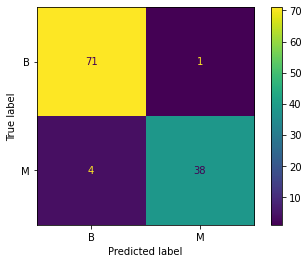

              precision    recall  f1-score   support

           B       0.95      0.99      0.97        72
           M       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


# ====================

[[284   1]
 [ 10 160]]


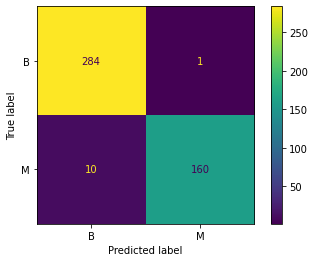

              precision    recall  f1-score   support

           B       0.97      1.00      0.98       285
           M       0.99      0.94      0.97       170

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.98      0.98      0.98       455



In [85]:
y_pred_test = grid_knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

y_pred_train = grid_knn.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

Voltando pro recall:

In [86]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns="diagnosis")
y = df["diagnosis"]

# ====================

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)
# ====================

lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsClassifier())]

pipe = Pipeline(lista_etapas)

# ====================

# agora, tá estratificado!
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

metrica = make_scorer(recall_score, pos_label="M")

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(2, 21)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn = GridSearchCV(estimator=pipe, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_knn.fit(X_train, y_train)

Fitting 10 folds for each of 76 candidates, totalling 760 fits
[CV 1/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 3/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 1/76] END knn__metric=manhatt

[CV 5/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 6/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 6/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 7/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 8/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 9/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 10/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__

[CV 7/10; 9/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 9/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 8/10; 9/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 9/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 9/10; 9/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 9/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform
[CV 10/10; 9/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 10/76] START knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance
[CV 1/10; 10/76] END knn__metric=manhattan, knn__n_neighbors=6, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 10/76] START knn__metric=manhattan, knn__n_neighbors=6,

[CV 8/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 13/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 9/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 13/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 10/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 14/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 1/10; 14/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 14/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance
[CV 2/10; 14/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 14/76] START knn__metric=manhattan, knn__n_nei

[CV 3/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 18/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 4/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 18/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 5/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 6/10; 18/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 6/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 18/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 7/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 18/76] START knn__metric=manhattan

[CV 5/10; 22/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 6/10; 22/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance
[CV 6/10; 22/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 7/10; 22/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance
[CV 7/10; 22/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 22/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance
[CV 8/10; 22/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 22/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance
[CV 9/10; 22/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 22/76] START knn__metric=manhatta

[CV 6/10; 27/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 27/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 7/10; 27/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 27/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 8/10; 27/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 27/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 9/10; 27/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 27/76] START knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform
[CV 10/10; 27/76] END knn__metric=manhattan, knn__n_neighbors=15, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 28/76] START knn__metric=manhattan, knn__

[CV 8/10; 31/76] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 31/76] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform
[CV 9/10; 31/76] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 31/76] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform
[CV 10/10; 31/76] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 32/76] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance
[CV 1/10; 32/76] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 32/76] START knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance
[CV 2/10; 32/76] END knn__metric=manhattan, knn__n_neighbors=17, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 32/76] START knn__metric=manhattan, k

[CV 10/10; 35/76] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 36/76] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance
[CV 1/10; 36/76] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 2/10; 36/76] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance
[CV 2/10; 36/76] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 36/76] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance
[CV 3/10; 36/76] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 4/10; 36/76] START knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance
[CV 4/10; 36/76] END knn__metric=manhattan, knn__n_neighbors=19, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 36/76] START knn__metric=manhattan

[CV 9/10; 40/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 40/76] START knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance
[CV 10/10; 40/76] END knn__metric=euclidean, knn__n_neighbors=2, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 41/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform
[CV 1/10; 41/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 2/10; 41/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform
[CV 2/10; 41/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 41/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform
[CV 3/10; 41/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 4/10; 41/76] START knn__metric=euclidean, knn__n_neig

[CV 6/10; 45/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 45/76] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform
[CV 7/10; 45/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform;, score=0.706 total time=   0.0s
[CV 8/10; 45/76] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform
[CV 8/10; 45/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 45/76] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform
[CV 9/10; 45/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 10/10; 45/76] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform
[CV 10/10; 45/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 1/10; 46/76] START knn__metric=euclidean, knn__n_neighbo

[CV 8/10; 49/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 49/76] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform
[CV 9/10; 49/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 49/76] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform
[CV 10/10; 49/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=uniform;, score=0.882 total time=   0.0s
[CV 1/10; 50/76] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance
[CV 1/10; 50/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 2/10; 50/76] START knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance
[CV 2/10; 50/76] END knn__metric=euclidean, knn__n_neighbors=7, knn__weights=distance;, score=0.824 total time=   0.0s
[CV 3/10; 50/76] START knn__metric=euclidean, knn__n_nei

[CV 3/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=0.941 total time=   0.0s
[CV 4/10; 58/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 4/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 5/10; 58/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 5/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 6/10; 58/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 6/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 7/10; 58/76] START knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance
[CV 7/10; 58/76] END knn__metric=euclidean, knn__n_neighbors=11, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 58/76] START knn__metric=euclidean

[CV 7/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=0.765 total time=   0.0s
[CV 8/10; 62/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 8/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 9/10; 62/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 9/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=1.000 total time=   0.0s
[CV 10/10; 62/76] START knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance
[CV 10/10; 62/76] END knn__metric=euclidean, knn__n_neighbors=13, knn__weights=distance;, score=0.882 total time=   0.0s
[CV 1/10; 63/76] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 1/10; 63/76] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 63/76] START knn__metric=euclidean

[CV 1/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 2/10; 67/76] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 2/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 3/10; 67/76] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 3/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 4/10; 67/76] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 4/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 5/10; 67/76] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 5/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 6/10; 67/76] START knn__metric=euclidean, knn__n_

[CV 5/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 6/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 6/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 7/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 8/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 9/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=0.941 total time=   0.0s
[CV 10/10; 71/76] START knn__metric=euclidean, knn__n

[CV 6/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 7/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 7/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=0.765 total time=   0.0s
[CV 8/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 8/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 9/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 9/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10; 75/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform
[CV 10/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=0.824 total time=   0.0s
[CV 1/10; 76/76] START knn__metric=euclidean, knn__

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring=make_scorer(recall_score, pos_label=M), verbose=10)

[[71  1]
 [ 3 39]]


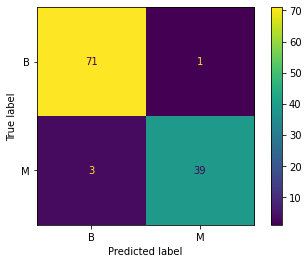

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


# ====================

[[285   0]
 [  7 163]]


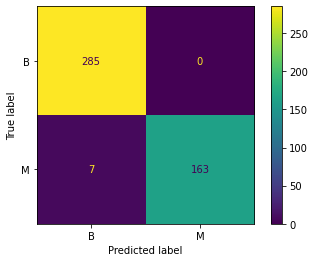

              precision    recall  f1-score   support

           B       0.98      1.00      0.99       285
           M       1.00      0.96      0.98       170

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



In [87]:
y_pred_test = grid_knn.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

print("\n# ====================\n")

y_pred_train = grid_knn.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))

## Exercício

2 - Vamos revisitar o exercício do insurance, agora nosso objetivo é utilizar o GridSearch para otimizar o número k de vizinhos, bem como qual dos tipos de weights e metrics para maximizar a acurácia.

#### Passo a passo

1 - Faça a leitura do dataset e escolha as features

2 - Efetue o train test split

3 - Defina as etapas do pipeline

4 - Instancie o pipeline

5 - Faça a divisão dos folds

6 - Defina as métricas que o GridSearch irá avaliar

7 - Instanciar o GridSearch

8 - Fazer o fit do GridSearch

9 - Avalie os resultados

____
____
____

## 3) KNN para regressão

O KNN é nosso primeiro exemplo de algoritmo que pode ser utilizado para ambos os problemas de classificação e regressão!

A ideia é bem simples: o target atribuído a uma nova observação é igual à **média do target das $k$ observações mais próximas**

<img src="https://bookdown.org/f100441618/bookdown-regresion/www/KNN.jpg" width=500>

Naturalmente, também para regressão o parâmetro $k$ e a métrica de distância são hiperparâmetros importantes:

<img src="https://i.stack.imgur.com/gAILq.png" width=500>

A classe no sklearn é a [KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html). Dê uma olhada no User Guide e também no [RadiusNeighborsRegressor!](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor)

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
df_houses = pd.read_csv("house_prices.csv")
df_houses = df_houses.select_dtypes(include=np.number).dropna()

X = df_houses[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = df_houses['Price']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

KeyError: "None of [Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',\n       'Avg. Area Number of Bedrooms', 'Area Population'],\n      dtype='object')] are in the [columns]"

In [121]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsRegressor())]

pipe = Pipeline(lista_etapas)

# ====================

# aqui, kfold normal pq nao tem classe pra estratificar
splitter = KFold(n_splits=10, shuffle=True, random_state=42)

metrica = "neg_mean_absolute_error"

# ====================

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(2, 21)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn_reg = GridSearchCV(estimator=pipe, 
                            param_grid=param_grid,
                            scoring=metrica,
                            cv=splitter,
                            verbose=10)

grid_knn_reg.fit(X_train, y_train)

Fitting 10 folds for each of 76 candidates, totalling 760 fits
[CV 1/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 1/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=-26932.550 total time=   0.0s
[CV 2/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 2/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=-23116.539 total time=   0.0s
[CV 3/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 3/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=-23705.983 total time=   0.0s
[CV 4/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 4/10; 1/76] END knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform;, score=-28354.044 total time=   0.0s
[CV 5/10; 1/76] START knn__metric=manhattan, knn__n_neighbors=2, knn__weights=uniform
[CV 5/10; 1/76] END

[CV 6/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=-16855.194 total time=   0.0s
[CV 7/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 7/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=-18972.831 total time=   0.0s
[CV 8/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 8/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=-19153.093 total time=   0.0s
[CV 9/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 9/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=-25155.801 total time=   0.0s
[CV 10/10; 5/76] START knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform
[CV 10/10; 5/76] END knn__metric=manhattan, knn__n_neighbors=4, knn__weights=uniform;, score=-19693.371 total time=   0.0s
[CV 1/10; 6/76] START knn__metric=manhattan,

[CV 4/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=-25143.407 total time=   0.0s
[CV 5/10; 13/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 5/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=-18584.381 total time=   0.0s
[CV 6/10; 13/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 6/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=-16288.326 total time=   0.0s
[CV 7/10; 13/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 7/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=-18143.223 total time=   0.0s
[CV 8/10; 13/76] START knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform
[CV 8/10; 13/76] END knn__metric=manhattan, knn__n_neighbors=8, knn__weights=uniform;, score=-21120.757 total time=   0.0s
[CV 9/10; 13/76] START knn__metric=ma

[CV 7/10; 17/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform;, score=-18815.471 total time=   0.0s
[CV 8/10; 17/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform
[CV 8/10; 17/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform;, score=-21003.175 total time=   0.0s
[CV 9/10; 17/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform
[CV 9/10; 17/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform;, score=-23630.922 total time=   0.0s
[CV 10/10; 17/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform
[CV 10/10; 17/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=uniform;, score=-20393.155 total time=   0.0s
[CV 1/10; 18/76] START knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance
[CV 1/10; 18/76] END knn__metric=manhattan, knn__n_neighbors=10, knn__weights=distance;, score=-21727.375 total time=   0.0s
[CV 2/10; 18/76] START k

[CV 6/10; 21/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=-15459.534 total time=   0.0s
[CV 7/10; 21/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 7/10; 21/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=-18729.182 total time=   0.0s
[CV 8/10; 21/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 8/10; 21/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=-20963.419 total time=   0.0s
[CV 9/10; 21/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 9/10; 21/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=-23902.573 total time=   0.0s
[CV 10/10; 21/76] START knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform
[CV 10/10; 21/76] END knn__metric=manhattan, knn__n_neighbors=12, knn__weights=uniform;, score=-20653.865 total time=   0.0s
[CV 1/10; 22/76] START knn

[CV 10/10; 25/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform
[CV 10/10; 25/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=uniform;, score=-21400.307 total time=   0.0s
[CV 1/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 1/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=-21385.236 total time=   0.0s
[CV 2/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 2/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=-21529.928 total time=   0.0s
[CV 3/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 3/10; 26/76] END knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance;, score=-21184.054 total time=   0.0s
[CV 4/10; 26/76] START knn__metric=manhattan, knn__n_neighbors=14, knn__weights=distance
[CV 4/10; 26/76] END knn__metric=manhattan, knn__n_neig

[CV 10/10; 33/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=uniform;, score=-20321.953 total time=   0.0s
[CV 1/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 1/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=-21790.701 total time=   0.0s
[CV 2/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 2/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=-22315.660 total time=   0.0s
[CV 3/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 3/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=-22044.760 total time=   0.0s
[CV 4/10; 34/76] START knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance
[CV 4/10; 34/76] END knn__metric=manhattan, knn__n_neighbors=18, knn__weights=distance;, score=-24745.256 total time=   0.0s
[CV 5/10; 34/76] ST

[CV 4/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=-24873.089 total time=   0.0s
[CV 5/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 5/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=-20248.482 total time=   0.0s
[CV 6/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 6/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=-14431.126 total time=   0.0s
[CV 7/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 7/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=-19136.247 total time=   0.0s
[CV 8/10; 38/76] START knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance
[CV 8/10; 38/76] END knn__metric=manhattan, knn__n_neighbors=20, knn__weights=distance;, score=-21948.561 total time=   0.0s
[CV 9/10; 38/76] ST

[CV 4/10; 42/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 4/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=-29080.903 total time=   0.0s
[CV 5/10; 42/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 5/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=-22645.795 total time=   0.0s
[CV 6/10; 42/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 6/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=-19347.741 total time=   0.0s
[CV 7/10; 42/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 7/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance;, score=-23368.583 total time=   0.0s
[CV 8/10; 42/76] START knn__metric=euclidean, knn__n_neighbors=3, knn__weights=distance
[CV 8/10; 42/76] END knn__metric=euclidean, knn__n_neighbors=3, 

[CV 9/10; 46/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance;, score=-29342.286 total time=   0.0s
[CV 10/10; 46/76] START knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance
[CV 10/10; 46/76] END knn__metric=euclidean, knn__n_neighbors=5, knn__weights=distance;, score=-23239.199 total time=   0.0s
[CV 1/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 1/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=-24521.802 total time=   0.0s
[CV 2/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 2/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=-22593.870 total time=   0.0s
[CV 3/10; 47/76] START knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform
[CV 3/10; 47/76] END knn__metric=euclidean, knn__n_neighbors=6, knn__weights=uniform;, score=-22342.587 total time=   0.0s
[CV 4/10; 47/76] START knn__metr

[CV 1/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=-24311.797 total time=   0.0s
[CV 2/10; 51/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 2/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=-21932.171 total time=   0.0s
[CV 3/10; 51/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 3/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=-22416.854 total time=   0.0s
[CV 4/10; 51/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 4/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=-25643.101 total time=   0.0s
[CV 5/10; 51/76] START knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform
[CV 5/10; 51/76] END knn__metric=euclidean, knn__n_neighbors=8, knn__weights=uniform;, score=-21398.407 total time=   0.0s
[CV 6/10; 51/76] START knn__metric=eu

[CV 6/10; 55/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform;, score=-17705.907 total time=   0.0s
[CV 7/10; 55/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform
[CV 7/10; 55/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform;, score=-20221.116 total time=   0.0s
[CV 8/10; 55/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform
[CV 8/10; 55/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform;, score=-24214.122 total time=   0.0s
[CV 9/10; 55/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform
[CV 9/10; 55/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform;, score=-25591.601 total time=   0.0s
[CV 10/10; 55/76] START knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform
[CV 10/10; 55/76] END knn__metric=euclidean, knn__n_neighbors=10, knn__weights=uniform;, score=-23835.490 total time=   0.0s
[CV 1/10; 56/76] START knn

[CV 3/10; 63/76] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=-22928.148 total time=   0.0s
[CV 4/10; 63/76] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 4/10; 63/76] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=-25708.229 total time=   0.0s
[CV 5/10; 63/76] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 5/10; 63/76] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=-20631.151 total time=   0.0s
[CV 6/10; 63/76] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 6/10; 63/76] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=-17109.294 total time=   0.0s
[CV 7/10; 63/76] START knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform
[CV 7/10; 63/76] END knn__metric=euclidean, knn__n_neighbors=14, knn__weights=uniform;, score=-20342.703 total time=   0.0s
[CV 8/10; 63/76] START knn__

[CV 4/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=-26038.362 total time=   0.0s
[CV 5/10; 67/76] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 5/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=-21191.384 total time=   0.0s
[CV 6/10; 67/76] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 6/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=-16333.576 total time=   0.0s
[CV 7/10; 67/76] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 7/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=-20636.768 total time=   0.0s
[CV 8/10; 67/76] START knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform
[CV 8/10; 67/76] END knn__metric=euclidean, knn__n_neighbors=16, knn__weights=uniform;, score=-23939.140 total time=   0.0s
[CV 9/10; 67/76] START knn__

[CV 4/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=-27253.030 total time=   0.0s
[CV 5/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 5/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=-21159.485 total time=   0.0s
[CV 6/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 6/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=-16537.443 total time=   0.0s
[CV 7/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 7/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=-20815.148 total time=   0.0s
[CV 8/10; 71/76] START knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform
[CV 8/10; 71/76] END knn__metric=euclidean, knn__n_neighbors=18, knn__weights=uniform;, score=-24263.041 total time=   0.0s
[CV 9/10; 71/76] START knn__

[CV 10/10; 75/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=uniform;, score=-23041.397 total time=   0.0s
[CV 1/10; 76/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 1/10; 76/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=-22595.971 total time=   0.0s
[CV 2/10; 76/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 2/10; 76/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=-23873.095 total time=   0.0s
[CV 3/10; 76/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 3/10; 76/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=-23106.689 total time=   0.0s
[CV 4/10; 76/76] START knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance
[CV 4/10; 76/76] END knn__metric=euclidean, knn__n_neighbors=20, knn__weights=distance;, score=-26702.380 total time=   0.0s
[CV 5/10; 76/76] ST

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error', verbose=10)

In [122]:
grid_knn_reg.best_params_

{'knn__metric': 'manhattan', 'knn__n_neighbors': 8, 'knn__weights': 'distance'}

In [123]:
grid_knn_reg.best_score_

-20297.192189179004

In [124]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = grid_knn_reg.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = grid_knn_reg.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 


Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

Métricas de teste:

R^2: 0.81
MAE: 20875.14
RMSE: 38970.95


Limitando o k, pra fugir de overfitting

In [127]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsRegressor())]

pipe = Pipeline(lista_etapas)

# ====================

# aqui, kfold normal pq nao tem classe pra estratificar
splitter = KFold(n_splits=10, shuffle=True, random_state=42)

metrica = "neg_mean_absolute_error"

# ====================

param_grid = {"knn__weights" : ["uniform"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(50, 100)}

# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn_reg = GridSearchCV(estimator=pipe, 
                            param_grid=param_grid,
                            scoring=metrica,
                            cv=splitter,
                            verbose=10)

grid_knn_reg.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV 1/10; 1/100] START knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform
[CV 1/10; 1/100] END knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform;, score=-22931.016 total time=   0.0s
[CV 2/10; 1/100] START knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform
[CV 2/10; 1/100] END knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform;, score=-25581.902 total time=   0.0s
[CV 3/10; 1/100] START knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform
[CV 3/10; 1/100] END knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform;, score=-25554.409 total time=   0.0s
[CV 4/10; 1/100] START knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform
[CV 4/10; 1/100] END knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform;, score=-26511.032 total time=   0.0s
[CV 5/10; 1/100] START knn__metric=manhattan, knn__n_neighbors=50, knn__weights=uniform

[CV 9/10; 4/100] END knn__metric=manhattan, knn__n_neighbors=53, knn__weights=uniform;, score=-25016.882 total time=   0.0s
[CV 10/10; 4/100] START knn__metric=manhattan, knn__n_neighbors=53, knn__weights=uniform
[CV 10/10; 4/100] END knn__metric=manhattan, knn__n_neighbors=53, knn__weights=uniform;, score=-23494.428 total time=   0.0s
[CV 1/10; 5/100] START knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform
[CV 1/10; 5/100] END knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform;, score=-23027.075 total time=   0.0s
[CV 2/10; 5/100] START knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform
[CV 2/10; 5/100] END knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform;, score=-25852.305 total time=   0.0s
[CV 3/10; 5/100] START knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform
[CV 3/10; 5/100] END knn__metric=manhattan, knn__n_neighbors=54, knn__weights=uniform;, score=-25995.309 total time=   0.0s
[CV 4/10; 5/100] START knn

[CV 10/10; 8/100] END knn__metric=manhattan, knn__n_neighbors=57, knn__weights=uniform;, score=-23855.681 total time=   0.0s
[CV 1/10; 9/100] START knn__metric=manhattan, knn__n_neighbors=58, knn__weights=uniform
[CV 1/10; 9/100] END knn__metric=manhattan, knn__n_neighbors=58, knn__weights=uniform;, score=-23249.918 total time=   0.0s
[CV 2/10; 9/100] START knn__metric=manhattan, knn__n_neighbors=58, knn__weights=uniform
[CV 2/10; 9/100] END knn__metric=manhattan, knn__n_neighbors=58, knn__weights=uniform;, score=-26049.809 total time=   0.0s
[CV 3/10; 9/100] START knn__metric=manhattan, knn__n_neighbors=58, knn__weights=uniform
[CV 3/10; 9/100] END knn__metric=manhattan, knn__n_neighbors=58, knn__weights=uniform;, score=-26081.213 total time=   0.0s
[CV 4/10; 9/100] START knn__metric=manhattan, knn__n_neighbors=58, knn__weights=uniform
[CV 4/10; 9/100] END knn__metric=manhattan, knn__n_neighbors=58, knn__weights=uniform;, score=-26908.737 total time=   0.0s
[CV 5/10; 9/100] START knn_

[CV 9/10; 12/100] END knn__metric=manhattan, knn__n_neighbors=61, knn__weights=uniform;, score=-25457.940 total time=   0.0s
[CV 10/10; 12/100] START knn__metric=manhattan, knn__n_neighbors=61, knn__weights=uniform
[CV 10/10; 12/100] END knn__metric=manhattan, knn__n_neighbors=61, knn__weights=uniform;, score=-24061.087 total time=   0.0s
[CV 1/10; 13/100] START knn__metric=manhattan, knn__n_neighbors=62, knn__weights=uniform
[CV 1/10; 13/100] END knn__metric=manhattan, knn__n_neighbors=62, knn__weights=uniform;, score=-23244.913 total time=   0.0s
[CV 2/10; 13/100] START knn__metric=manhattan, knn__n_neighbors=62, knn__weights=uniform
[CV 2/10; 13/100] END knn__metric=manhattan, knn__n_neighbors=62, knn__weights=uniform;, score=-26447.844 total time=   0.0s
[CV 3/10; 13/100] START knn__metric=manhattan, knn__n_neighbors=62, knn__weights=uniform
[CV 3/10; 13/100] END knn__metric=manhattan, knn__n_neighbors=62, knn__weights=uniform;, score=-26624.135 total time=   0.0s
[CV 4/10; 13/100]

[CV 10/10; 16/100] END knn__metric=manhattan, knn__n_neighbors=65, knn__weights=uniform;, score=-24225.244 total time=   0.0s
[CV 1/10; 17/100] START knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform
[CV 1/10; 17/100] END knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform;, score=-23515.946 total time=   0.0s
[CV 2/10; 17/100] START knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform
[CV 2/10; 17/100] END knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform;, score=-26855.659 total time=   0.0s
[CV 3/10; 17/100] START knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform
[CV 3/10; 17/100] END knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform;, score=-26910.911 total time=   0.0s
[CV 4/10; 17/100] START knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform
[CV 4/10; 17/100] END knn__metric=manhattan, knn__n_neighbors=66, knn__weights=uniform;, score=-27449.825 total time=   0.0s
[CV 5/10; 17/100] 

[CV 1/10; 25/100] END knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform;, score=-23475.582 total time=   0.0s
[CV 2/10; 25/100] START knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform
[CV 2/10; 25/100] END knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform;, score=-27606.608 total time=   0.0s
[CV 3/10; 25/100] START knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform
[CV 3/10; 25/100] END knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform;, score=-27504.620 total time=   0.0s
[CV 4/10; 25/100] START knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform
[CV 4/10; 25/100] END knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform;, score=-27580.799 total time=   0.0s
[CV 5/10; 25/100] START knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform
[CV 5/10; 25/100] END knn__metric=manhattan, knn__n_neighbors=74, knn__weights=uniform;, score=-22780.969 total time=   0.0s
[CV 6/10; 25/100] S

[CV 3/10; 29/100] END knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform;, score=-27990.249 total time=   0.0s
[CV 4/10; 29/100] START knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform
[CV 4/10; 29/100] END knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform;, score=-27973.707 total time=   0.0s
[CV 5/10; 29/100] START knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform
[CV 5/10; 29/100] END knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform;, score=-23190.067 total time=   0.0s
[CV 6/10; 29/100] START knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform
[CV 6/10; 29/100] END knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform;, score=-17580.927 total time=   0.0s
[CV 7/10; 29/100] START knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform
[CV 7/10; 29/100] END knn__metric=manhattan, knn__n_neighbors=78, knn__weights=uniform;, score=-24338.023 total time=   0.0s
[CV 8/10; 29/100] S

[CV 2/10; 33/100] END knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform;, score=-27622.545 total time=   0.0s
[CV 3/10; 33/100] START knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform
[CV 3/10; 33/100] END knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform;, score=-28384.021 total time=   0.0s
[CV 4/10; 33/100] START knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform
[CV 4/10; 33/100] END knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform;, score=-28244.763 total time=   0.0s
[CV 5/10; 33/100] START knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform
[CV 5/10; 33/100] END knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform;, score=-23277.061 total time=   0.0s
[CV 6/10; 33/100] START knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform
[CV 6/10; 33/100] END knn__metric=manhattan, knn__n_neighbors=82, knn__weights=uniform;, score=-17773.342 total time=   0.0s
[CV 7/10; 33/100] S

[CV 9/10; 40/100] END knn__metric=manhattan, knn__n_neighbors=89, knn__weights=uniform;, score=-26745.156 total time=   0.0s
[CV 10/10; 40/100] START knn__metric=manhattan, knn__n_neighbors=89, knn__weights=uniform
[CV 10/10; 40/100] END knn__metric=manhattan, knn__n_neighbors=89, knn__weights=uniform;, score=-25336.539 total time=   0.0s
[CV 1/10; 41/100] START knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform
[CV 1/10; 41/100] END knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform;, score=-23780.244 total time=   0.0s
[CV 2/10; 41/100] START knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform
[CV 2/10; 41/100] END knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform;, score=-27956.544 total time=   0.0s
[CV 3/10; 41/100] START knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform
[CV 3/10; 41/100] END knn__metric=manhattan, knn__n_neighbors=90, knn__weights=uniform;, score=-28727.204 total time=   0.0s
[CV 4/10; 41/100]

[CV 9/10; 44/100] START knn__metric=manhattan, knn__n_neighbors=93, knn__weights=uniform
[CV 9/10; 44/100] END knn__metric=manhattan, knn__n_neighbors=93, knn__weights=uniform;, score=-26741.427 total time=   0.0s
[CV 10/10; 44/100] START knn__metric=manhattan, knn__n_neighbors=93, knn__weights=uniform
[CV 10/10; 44/100] END knn__metric=manhattan, knn__n_neighbors=93, knn__weights=uniform;, score=-25352.468 total time=   0.0s
[CV 1/10; 45/100] START knn__metric=manhattan, knn__n_neighbors=94, knn__weights=uniform
[CV 1/10; 45/100] END knn__metric=manhattan, knn__n_neighbors=94, knn__weights=uniform;, score=-23993.383 total time=   0.0s
[CV 2/10; 45/100] START knn__metric=manhattan, knn__n_neighbors=94, knn__weights=uniform
[CV 2/10; 45/100] END knn__metric=manhattan, knn__n_neighbors=94, knn__weights=uniform;, score=-28117.240 total time=   0.0s
[CV 3/10; 45/100] START knn__metric=manhattan, knn__n_neighbors=94, knn__weights=uniform
[CV 3/10; 45/100] END knn__metric=manhattan, knn__n_n

[CV 6/10; 49/100] END knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform;, score=-18078.710 total time=   0.0s
[CV 7/10; 49/100] START knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform
[CV 7/10; 49/100] END knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform;, score=-25091.422 total time=   0.0s
[CV 8/10; 49/100] START knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform
[CV 8/10; 49/100] END knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform;, score=-26371.070 total time=   0.0s
[CV 9/10; 49/100] START knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform
[CV 9/10; 49/100] END knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform;, score=-26950.622 total time=   0.0s
[CV 10/10; 49/100] START knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform
[CV 10/10; 49/100] END knn__metric=manhattan, knn__n_neighbors=98, knn__weights=uniform;, score=-25569.732 total time=   0.0s
[CV 1/10; 50/100]

[CV 1/10; 54/100] END knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform;, score=-24164.970 total time=   0.0s
[CV 2/10; 54/100] START knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform
[CV 2/10; 54/100] END knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform;, score=-27094.681 total time=   0.0s
[CV 3/10; 54/100] START knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform
[CV 3/10; 54/100] END knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform;, score=-27240.875 total time=   0.0s
[CV 4/10; 54/100] START knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform
[CV 4/10; 54/100] END knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform;, score=-28907.408 total time=   0.0s
[CV 5/10; 54/100] START knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform
[CV 5/10; 54/100] END knn__metric=euclidean, knn__n_neighbors=53, knn__weights=uniform;, score=-22613.173 total time=   0.0s
[CV 6/10; 54/100] S

[CV 10/10; 57/100] END knn__metric=euclidean, knn__n_neighbors=56, knn__weights=uniform;, score=-26012.027 total time=   0.0s
[CV 1/10; 58/100] START knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform
[CV 1/10; 58/100] END knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform;, score=-24623.204 total time=   0.0s
[CV 2/10; 58/100] START knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform
[CV 2/10; 58/100] END knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform;, score=-27694.425 total time=   0.0s
[CV 3/10; 58/100] START knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform
[CV 3/10; 58/100] END knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform;, score=-27550.141 total time=   0.0s
[CV 4/10; 58/100] START knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform
[CV 4/10; 58/100] END knn__metric=euclidean, knn__n_neighbors=57, knn__weights=uniform;, score=-29050.192 total time=   0.0s
[CV 5/10; 58/100] 

[CV 4/10; 62/100] END knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform;, score=-29398.445 total time=   0.0s
[CV 5/10; 62/100] START knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform
[CV 5/10; 62/100] END knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform;, score=-23367.501 total time=   0.0s
[CV 6/10; 62/100] START knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform
[CV 6/10; 62/100] END knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform;, score=-18034.030 total time=   0.0s
[CV 7/10; 62/100] START knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform
[CV 7/10; 62/100] END knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform;, score=-24455.105 total time=   0.0s
[CV 8/10; 62/100] START knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform
[CV 8/10; 62/100] END knn__metric=euclidean, knn__n_neighbors=61, knn__weights=uniform;, score=-26613.213 total time=   0.0s
[CV 9/10; 62/100] S

[CV 5/10; 66/100] END knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform;, score=-23650.176 total time=   0.0s
[CV 6/10; 66/100] START knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform
[CV 6/10; 66/100] END knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform;, score=-17883.280 total time=   0.0s
[CV 7/10; 66/100] START knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform
[CV 7/10; 66/100] END knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform;, score=-24570.908 total time=   0.0s
[CV 8/10; 66/100] START knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform
[CV 8/10; 66/100] END knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform;, score=-26814.513 total time=   0.0s
[CV 9/10; 66/100] START knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform
[CV 9/10; 66/100] END knn__metric=euclidean, knn__n_neighbors=65, knn__weights=uniform;, score=-28462.769 total time=   0.0s
[CV 10/10; 66/100] 

[CV 10/10; 70/100] END knn__metric=euclidean, knn__n_neighbors=69, knn__weights=uniform;, score=-26684.977 total time=   0.0s
[CV 1/10; 71/100] START knn__metric=euclidean, knn__n_neighbors=70, knn__weights=uniform
[CV 1/10; 71/100] END knn__metric=euclidean, knn__n_neighbors=70, knn__weights=uniform;, score=-24452.160 total time=   0.0s
[CV 2/10; 71/100] START knn__metric=euclidean, knn__n_neighbors=70, knn__weights=uniform
[CV 2/10; 71/100] END knn__metric=euclidean, knn__n_neighbors=70, knn__weights=uniform;, score=-28816.943 total time=   0.0s
[CV 3/10; 71/100] START knn__metric=euclidean, knn__n_neighbors=70, knn__weights=uniform
[CV 3/10; 71/100] END knn__metric=euclidean, knn__n_neighbors=70, knn__weights=uniform;, score=-28975.978 total time=   0.0s
[CV 4/10; 71/100] START knn__metric=euclidean, knn__n_neighbors=70, knn__weights=uniform
[CV 4/10; 71/100] END knn__metric=euclidean, knn__n_neighbors=70, knn__weights=uniform;, score=-29768.350 total time=   0.0s
[CV 5/10; 71/100] 

[CV 4/10; 75/100] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform;, score=-29999.024 total time=   0.0s
[CV 5/10; 75/100] START knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform
[CV 5/10; 75/100] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform;, score=-23940.699 total time=   0.0s
[CV 6/10; 75/100] START knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform
[CV 6/10; 75/100] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform;, score=-18268.492 total time=   0.0s
[CV 7/10; 75/100] START knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform
[CV 7/10; 75/100] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform;, score=-24881.652 total time=   0.0s
[CV 8/10; 75/100] START knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform
[CV 8/10; 75/100] END knn__metric=euclidean, knn__n_neighbors=74, knn__weights=uniform;, score=-27012.642 total time=   0.0s
[CV 9/10; 75/100] S

[CV 4/10; 79/100] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform;, score=-30056.176 total time=   0.0s
[CV 5/10; 79/100] START knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform
[CV 5/10; 79/100] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform;, score=-23983.409 total time=   0.0s
[CV 6/10; 79/100] START knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform
[CV 6/10; 79/100] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform;, score=-18433.554 total time=   0.0s
[CV 7/10; 79/100] START knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform
[CV 7/10; 79/100] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform;, score=-24954.945 total time=   0.0s
[CV 8/10; 79/100] START knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform
[CV 8/10; 79/100] END knn__metric=euclidean, knn__n_neighbors=78, knn__weights=uniform;, score=-26772.892 total time=   0.0s
[CV 9/10; 79/100] S

[CV 7/10; 83/100] END knn__metric=euclidean, knn__n_neighbors=82, knn__weights=uniform;, score=-25165.584 total time=   0.0s
[CV 8/10; 83/100] START knn__metric=euclidean, knn__n_neighbors=82, knn__weights=uniform
[CV 8/10; 83/100] END knn__metric=euclidean, knn__n_neighbors=82, knn__weights=uniform;, score=-26914.433 total time=   0.0s
[CV 9/10; 83/100] START knn__metric=euclidean, knn__n_neighbors=82, knn__weights=uniform
[CV 9/10; 83/100] END knn__metric=euclidean, knn__n_neighbors=82, knn__weights=uniform;, score=-28798.692 total time=   0.0s
[CV 10/10; 83/100] START knn__metric=euclidean, knn__n_neighbors=82, knn__weights=uniform
[CV 10/10; 83/100] END knn__metric=euclidean, knn__n_neighbors=82, knn__weights=uniform;, score=-26904.482 total time=   0.0s
[CV 1/10; 84/100] START knn__metric=euclidean, knn__n_neighbors=83, knn__weights=uniform
[CV 1/10; 84/100] END knn__metric=euclidean, knn__n_neighbors=83, knn__weights=uniform;, score=-24649.476 total time=   0.0s
[CV 2/10; 84/100]

[CV 6/10; 87/100] END knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform;, score=-18628.473 total time=   0.0s
[CV 7/10; 87/100] START knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform
[CV 7/10; 87/100] END knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform;, score=-25441.578 total time=   0.0s
[CV 8/10; 87/100] START knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform
[CV 8/10; 87/100] END knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform;, score=-27067.662 total time=   0.0s
[CV 9/10; 87/100] START knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform
[CV 9/10; 87/100] END knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform;, score=-28879.464 total time=   0.0s
[CV 10/10; 87/100] START knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform
[CV 10/10; 87/100] END knn__metric=euclidean, knn__n_neighbors=86, knn__weights=uniform;, score=-27066.876 total time=   0.0s
[CV 1/10; 88/100]

[CV 3/10; 92/100] END knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform;, score=-29507.817 total time=   0.0s
[CV 4/10; 92/100] START knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform
[CV 4/10; 92/100] END knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform;, score=-30451.637 total time=   0.0s
[CV 5/10; 92/100] START knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform
[CV 5/10; 92/100] END knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform;, score=-24271.785 total time=   0.0s
[CV 6/10; 92/100] START knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform
[CV 6/10; 92/100] END knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform;, score=-18709.411 total time=   0.0s
[CV 7/10; 92/100] START knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform
[CV 7/10; 92/100] END knn__metric=euclidean, knn__n_neighbors=91, knn__weights=uniform;, score=-25596.026 total time=   0.0s
[CV 8/10; 92/100] S

[CV 6/10; 96/100] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-18914.896 total time=   0.0s
[CV 7/10; 96/100] START knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform
[CV 7/10; 96/100] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-25746.988 total time=   0.0s
[CV 8/10; 96/100] START knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform
[CV 8/10; 96/100] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-27356.100 total time=   0.0s
[CV 9/10; 96/100] START knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform
[CV 9/10; 96/100] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-29184.137 total time=   0.0s
[CV 10/10; 96/100] START knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform
[CV 10/10; 96/100] END knn__metric=euclidean, knn__n_neighbors=95, knn__weights=uniform;, score=-27004.110 total time=   0.0s
[CV 1/10; 97/100]

[CV 7/10; 100/100] END knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform;, score=-25924.932 total time=   0.0s
[CV 8/10; 100/100] START knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform
[CV 8/10; 100/100] END knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform;, score=-27462.462 total time=   0.0s
[CV 9/10; 100/100] START knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform
[CV 9/10; 100/100] END knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform;, score=-29337.034 total time=   0.0s
[CV 10/10; 100/100] START knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform
[CV 10/10; 100/100] END knn__metric=euclidean, knn__n_neighbors=99, knn__weights=uniform;, score=-27010.982 total time=   0.0s


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(50, 100),
                         'knn__weights': ['uniform']},
             scoring='neg_mean_absolute_error', verbose=10)

In [128]:
# predições de treino
y_pred_train = grid_knn_reg.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = grid_knn_reg.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 


Métricas de treino:

R^2: 0.77
MAE: 22564.92
RMSE: 38739.83

Métricas de teste:

R^2: 0.70
MAE: 24995.13
RMSE: 48348.02


## Exercício para aula que vem

3 - Vamos fazer a regressão do exercício 1 (house_prices) utilizando o KNN com GridSearch

#### Passo a passo

1 - Faça a leitura do dataset e escolha as features (relembre da resolução do exercicio em aula)

2 - Efetue o train test split

3 - Defina as etapas do pipeline, aqui o estimador deve ser o KNeighborsRegressor

4 - Instancie o pipeline

5 - Faça a divisão dos folds

6 - Defina as métricas que o GridSearch irá avaliar

7 - Instanciar o GridSearch

8 - Fazer o fit do GridSearch

9 - Avalie os resultados

1 - Faça a leitura do dataset e escolha as features (relembre da resolução do exercicio em aula)

In [38]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

houses = pd.read_csv('usa_housing.csv')

In [39]:
X = houses[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = houses['Price']


2 - Efetue o train test split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

3 - Defina as etapas do pipeline, aqui o estimador deve ser o KNeighborsRegressor

In [41]:
lista_etapas = [("std_scaler", StandardScaler()), 
                ("knn", KNeighborsRegressor())]

4 - Instancie o pipeline

In [42]:
pipe = Pipeline(lista_etapas)

5 - Faça a divisão dos folds

In [43]:
splitter = KFold(n_splits=10, shuffle=True, random_state=42)

6 - Defina as métricas que o GridSearch irá avaliar

In [44]:
metrica = "neg_mean_absolute_error"

param_grid = {"knn__weights" : ["uniform", "distance"],
              "knn__metric" : ["manhattan", "euclidean"],
              "knn__n_neighbors" : range(2, 21)}

7 - Instanciar o GridSearch

In [45]:
# verbose=10 pra muitas combinações, os prints vão pro terminal
grid_knn_reg = GridSearchCV(estimator=pipe, 
                            param_grid=param_grid,
                            scoring=metrica,
                            cv=splitter)

8 - Fazer o fit do GridSearch

In [46]:
grid_knn_reg.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__metric': ['manhattan', 'euclidean'],
                         'knn__n_neighbors': range(2, 21),
                         'knn__weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_error')

9 - Avalie os resultados

In [47]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# predições de treino
y_pred_train = grid_knn_reg.predict(X_train)

print("\nMétricas de treino:\n")
print(f"R^2: {r2_score(y_train, y_pred_train):.2f}")
print(f"MAE: {mean_absolute_error(y_train, y_pred_train):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train)):.2f}")

# predições de teste
y_pred_test = grid_knn_reg.predict(X_test)

print("\nMétricas de teste:\n")
print(f"R^2: {r2_score(y_test, y_pred_test):.2f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_test):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test)):.2f}") 


Métricas de treino:

R^2: 1.00
MAE: 0.00
RMSE: 0.00

Métricas de teste:

R^2: 0.88
MAE: 96879.99
RMSE: 123162.65
